Using the dataset from Kaggle: https://www.kaggle.com/ntnu-testimon/paysim1
To detect mobile payment fraud

1.Step: Data Cleaning

In [1]:
#importing necessary libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
# Load data
paysim = pd.read_csv('data.csv')
paysim.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
#getting an overview
paysim.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


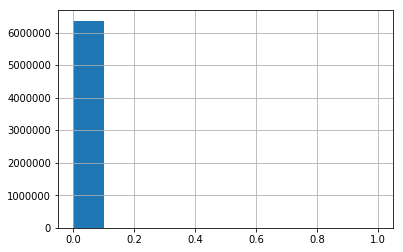

In [4]:
#checking the distribution of teh outcome variable (fraud/not fraud)
paysim['isFlaggedFraud'].hist()

There is some correlation between fields. I will Drop 'oldbalanceDest','oldbalanceOrig'


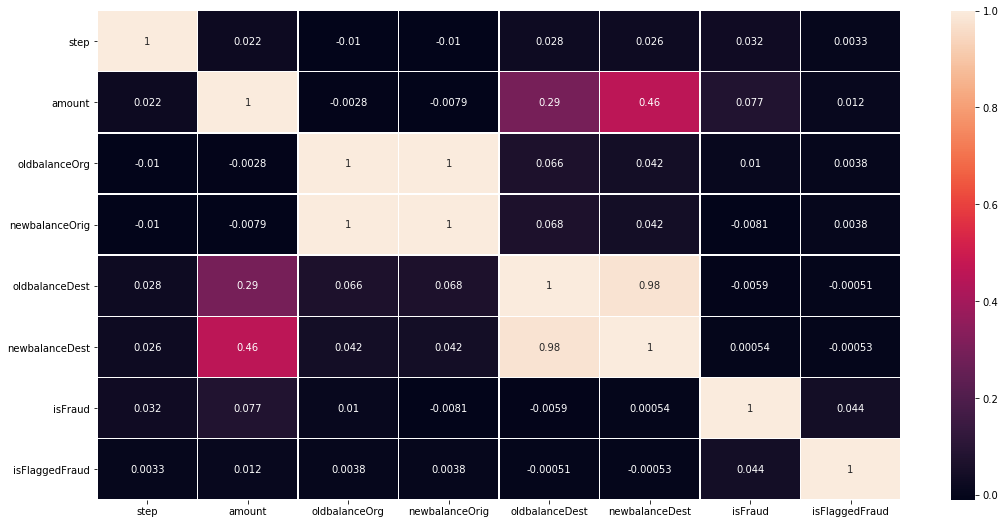

In [5]:
#checking for correlation
plt.figure(figsize=(18,9))
sns.heatmap(paysim.corr(), annot=True, linewidth=0.5)
print("There is some correlation between fields. I will Drop 'oldbalanceDest','oldbalanceOrig'")
paysim.drop(['oldbalanceDest','oldbalanceDest','oldbalanceOrg'], axis=1, inplace=True)

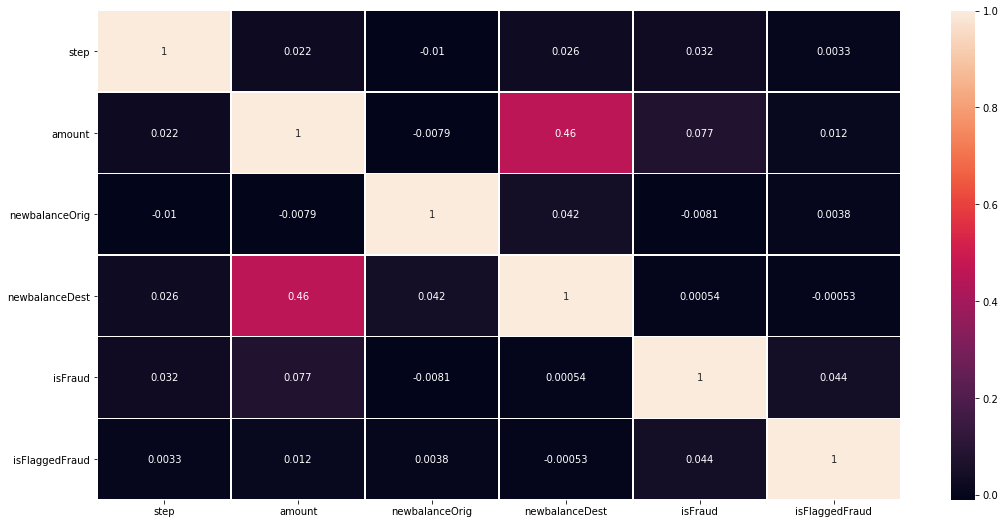

In [6]:
#Checking correlation again

plt.figure(figsize=(18,9))
sns.heatmap(paysim.corr(), annot=True, linewidth=0.5)

In [7]:
# Check for null values
print(paysim.isnull().sum())
#no null values

step              0
type              0
amount            0
nameOrig          0
newbalanceOrig    0
nameDest          0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


In [8]:
#checking data types
paysim.dtypes


step                int64
type               object
amount            float64
nameOrig           object
newbalanceOrig    float64
nameDest           object
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [11]:
# Create dummies 
dummies = pd.get_dummies(paysim['type'])
paysim_dummies= pd.concat([paysim, dummies], axis=1)

In [13]:
# Drop a few columns for a better overview
paysim_dummies.drop(['type','nameOrig','nameDest'], axis=1, inplace=True)

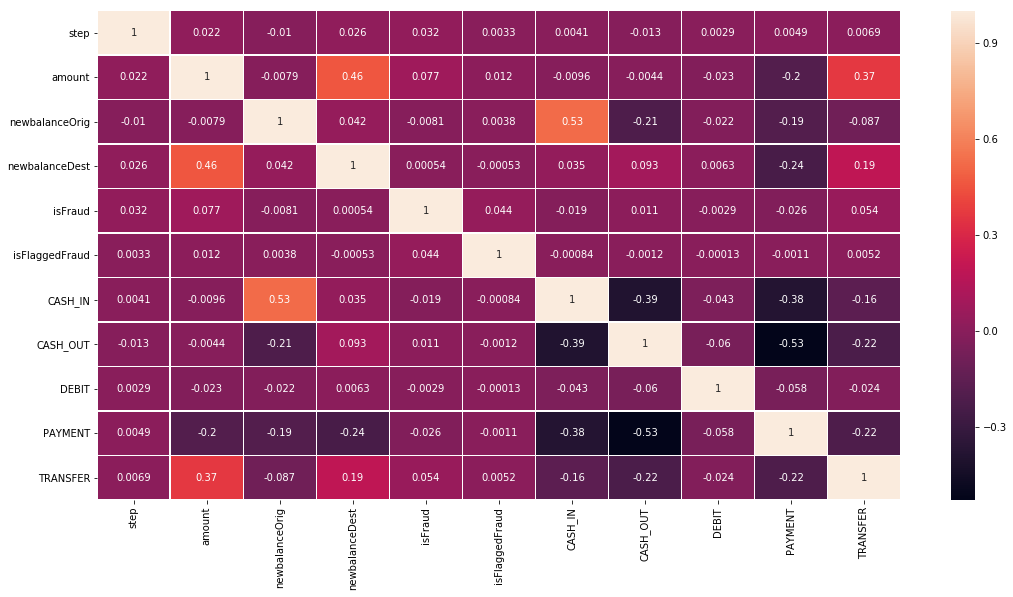

In [14]:
# Checking correlation once again
plt.figure(figsize=(18,9))
sns.heatmap(paysim_dummies.corr(), annot=True, linewidth=0.5)

2.Step: Creating a Model

Creating a Logisitc Regression Model to predict if a payment is fraudulent

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.utils import resample

In [16]:
paysim_dummies['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [17]:
# Deal with scalling
majority = paysim_dummies[paysim_dummies['isFraud'] == 0]
minority = paysim_dummies[paysim_dummies['isFraud'] == 1]
 
# Downsample majority class
majority_downsampled = resample(majority, replace=False, n_samples=len(minority), random_state=123)

# Combine minority class with downsampled majority class
paysim_downsampled = pd.concat([majority_downsampled, minority])

paysim_downsampled['isFraud'].value_counts()

1    8213
0    8213
Name: isFraud, dtype: int64

In [19]:
#Splitting data into Featuers and Label
y = paysim_downsampled['isFraud']
X = paysim_downsampled.drop(['isFraud'], axis=1)

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=True)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(13140, 10) (3286, 10) (13140,) (3286,)


In [20]:

# Create and train Model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [21]:
# Run model on test values
y_pred = model.predict(X_test)

In [22]:
#Check accuracy of model

accuracy = accuracy_score(y_test, y_pred)
accuracy_percentage = 100 * accuracy
accuracy_percentage

67.77236762020694

67% accuracy is not that high so I will try another model

In [23]:
#Using K-nearest-neigbours algorithm
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [24]:
# Make a prediction
knn_predict = knn.predict(X_test)

In [25]:
#Check accuracy of model
knn_accuracy = accuracy_score(y_test, knn_predict)
knn_accuracy_percentage = 100 * knn_accuracy
knn_accuracy_percentage

81.71028606208156

The second model has a accuracy of 81% which is not great but way better than the first model